In [1]:
%matplotlib inline
import skyflux

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [3]:
def project_J(J):
    hp.orthview(np.abs(J[:, 0, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 1], title='xx')
    hp.orthview(np.abs(J[:, 1, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 2], title='yx')
    hp.orthview(np.abs(J[:, 0, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 3], title='xy')
    hp.orthview(np.abs(J[:, 1, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 4], title='yy')

In [4]:
def project_Ai(A, i):
    hp.orthview(np.abs(A[:, i, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 1], title=str(i)+', 0')
    hp.orthview(np.abs(A[:, i, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 2], title=str(i)+', 1')
    hp.orthview(np.abs(A[:, i, 2]), rot=[0, 90], half_sky=True, sub=[2, 2, 3], title=str(i)+', 2')
    hp.orthview(np.abs(A[:, i, 3]), rot=[0, 90], half_sky=True, sub=[2, 2, 4], title=str(i)+', 3')

In [5]:
nside = 128
theta, phi = hp.pix2ang(nside, np.arange(12 * nside * nside))

In [6]:
print(theta)
print(phi)

[0.00637889 0.00637889 0.00637889 ... 3.13521376 3.13521376 3.13521376]
[0.78539816 2.35619449 3.92699082 ... 2.35619449 3.92699082 5.49778714]


[0.78539816 2.35619449 3.92699082 ... 2.35619449 3.92699082 5.49778714]
[ 1.56441744  1.56441744  1.56441744 ... -1.56441744 -1.56441744
 -1.56441744]


//anaconda3/envs/hera/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
//anaconda3/envs/hera/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
//anaconda3/envs/hera/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

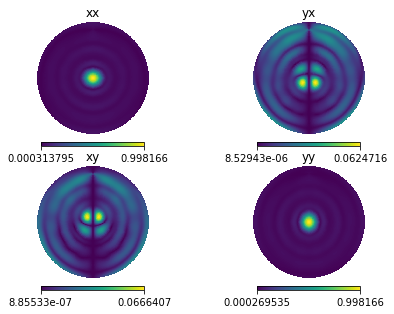

In [7]:
az = phi
alt = np.pi/2 - theta

print(az)
print(alt)

J_raw = skyflux.stokes.spline_beam_func(150e6, alt, az)
J = skyflux.stokes.format_J(J_raw)

project_J(J)

In [8]:
print(J.shape)

(196608, 2, 2)


In [9]:
A = np.array(
    [skyflux.stokes.create_A(J=Ji) for Ji in J]
)

print(A)

[[[ 9.96487254e-01+3.58279032e-05j -1.29514154e-03+1.21066158e-03j
   -1.21744939e-03-1.28855663e-03j  2.65756271e-03-4.20658464e-05j]
  [ 1.39854941e-03+1.41238821e-03j  9.96377581e-01+2.65786519e-03j
   -3.61282495e-05+1.52340184e-04j  1.41185586e-03-1.39822279e-03j]
  [ 1.40478793e-03-1.40594680e-03j  3.53253889e-05-1.52542348e-04j
    9.96293650e-01-2.65806735e-03j  1.40561734e-03+1.40425727e-03j]
  [-2.65836557e-03+4.18636828e-05j -1.21038146e-03-1.29465996e-03j
   -1.28807362e-03+1.21717184e-03j  9.96182372e-01-3.56257396e-05j]]

 [[ 9.96180815e-01+9.06101024e-05j -1.49406703e-03+1.35265390e-03j
   -1.36025794e-03-1.48622312e-03j  2.69513918e-03-1.68302259e-04j]
  [ 1.22741606e-03+1.31219368e-03j  9.96437096e-01+2.63083205e-03j
   -2.63518150e-05-2.16198392e-04j  1.31269667e-03-1.22801956e-03j]
  [ 1.30542783e-03-1.23438330e-03j  2.94455031e-05+9.07370278e-05j
    9.96225275e-01-2.75629341e-03j  1.23468490e-03+1.30559350e-03j]
  [-2.69202968e-03+4.28408955e-05j -1.35298910e-03-1.

In [10]:
print(A.shape)

print(J.shape)
print(J[:, 0, 0].shape)
print(A[0, :, 0].shape)

(196608, 4, 4)
(196608, 2, 2)
(196608,)
(4,)


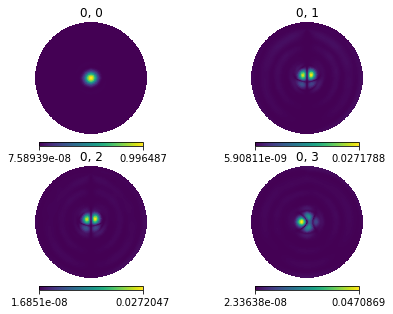

In [11]:
# The formatting is not great, but I could not get the healpy projection to size properly for a 4x4 grid of plots,
# so instead, I am doing four batches of separate 2x2 plots.
project_Ai(A, 0)

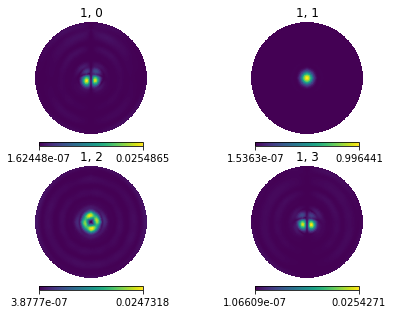

In [12]:
project_Ai(A, 1)

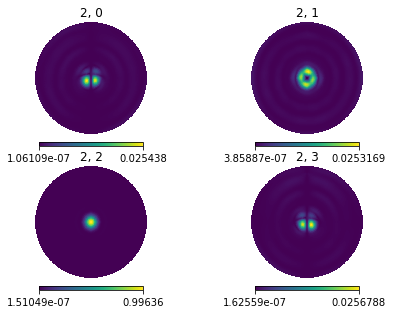

In [13]:
project_Ai(A, 2)

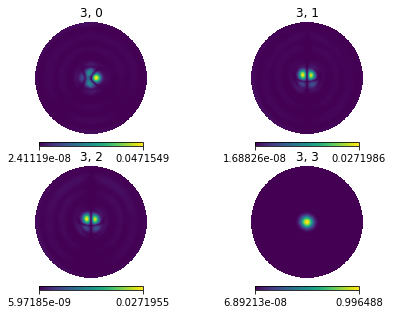

In [14]:
project_Ai(A, 3)